In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [17]:
env = gym.make('MountainCar-v0')
env.reset()


#print(env.observation_space.high)
#print(env.observation_space.low)
#print(env.action_space.n)

array([-0.45123903,  0.        ])

In [18]:
learning_rate = 0.01

#measure of how much we value future reward over current reward 
discount = 0.95
episodes = 3000
# measure of exploration you want to do(0-1) more likely to explore the enviroment quickly
epsilon = 0.5
start_epsilon_decay = 1
end_epsilon_decay = episodes // 2
epsilon_decay_value = epsilon/(end_epsilon_decay - start_epsilon_decay)

In [19]:
# observation space size [20,20] which is all the possible combinations(enviroment observation) of position and velocity
discrete_os_size = [20]* len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/discrete_os_size

ep_rewards = []
aggr_ep_rewards = {'ep':[], 'avg':[], 'min':[],'max':[]}
#print(discrete_os_size)
#print(discrete_os_win_size)

In [20]:
q_table = np.random.uniform(low = -2, high = 0,size = (discrete_os_size+[env.action_space.n]))
#print(q_table.shape)
#print(q_table)

In [21]:
def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low) / discrete_os_win_size
    return tuple(discrete_state.astype(np.int))
discrete_state = get_discrete_state(env.reset())
#print(discrete_state)
#print(np.argmax(q_table[discrete_state]))


In [22]:
show_episode = 500

In [23]:

for episode in range(episodes):
    discrete_state = get_discrete_state(env.reset())
    episode_reward = 0
    done = False
    if episode % show_episode == 0:
        print(episode)
        render = True
    else:
        render = False
    
    while not done: 
    # move right
        if np.random.random() > epsilon:
            action = np.argmax(q_table[discrete_state])
        else:
            action = np.random.randint(0,env.action_space.n)
        
        #action = np.argmax(q_table[discrete_state])
    # in every action we take we get a new state(position, velocity)
        new_state, reward, done, _ = env.step(action)
        episode_reward += reward
        new_discrete_state = get_discrete_state(new_state)
        #print(new_state)
        #print(reward)
        if render:
            env.render()
        #print(reward)
        if not done:
            max_future_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state +(action, )]
            
            # the q formula
            new_q = (1 - learning_rate)* current_q +learning_rate * (reward + discount * max_future_q)
            q_table[discrete_state + (action, )] = new_q
        
        elif new_state[0] >= env.goal_position:
            print('We made it on episode',episode)
            q_table[discrete_state + (action,)] = 0
        
        dicrete_state = new_discrete_state
    if end_epsilon_decay >= episode >= start_epsilon_decay:
        epsilon -= epsilon_decay_value
        
    ep_rewards.append(episode_reward)
    
    if not episode % show_episode:
        average_reward = sum(ep_rewards[-show_episode:])/len(ep_rewards[-show_episode:])
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['min'].append(min(ep_rewards[-show_episode:]))
        aggr_ep_rewards['max'].append(max(ep_rewards[-show_episode:]))
        print(f'Episode: {episode} avg: {average_reward} min: {min(ep_rewards[-show_episode:])} max: {max(ep_rewards[-show_episode:])}' )
        
env.close()


0
Episode: 0 avg: -200.0 min: -200.0 max: -200.0
500
Episode: 500 avg: -200.0 min: -200.0 max: -200.0
We made it on episode 872
We made it on episode 924
1000
Episode: 1000 avg: -199.758 min: -200.0 max: -90.0
We made it on episode 1211
We made it on episode 1240
We made it on episode 1249
We made it on episode 1278
We made it on episode 1305
We made it on episode 1317
1500
Episode: 1500 avg: -199.238 min: -200.0 max: -109.0
2000
Episode: 2000 avg: -200.0 min: -200.0 max: -200.0
2500
Episode: 2500 avg: -200.0 min: -200.0 max: -200.0


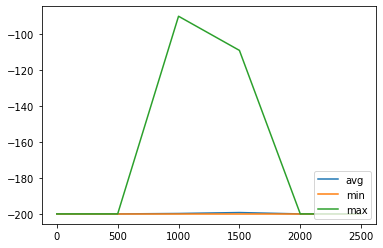

In [24]:
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label = 'avg')
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label = 'min')
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label = 'max')
plt.legend(loc = 4)
plt.show()